In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab
from tqdm import trange
import scipy

In [2]:
def compare (x ,y, eps):
    result = 1
    for k in range(len(x)):
        if abs(x[k] - y[k]) >= eps:
            result = 0
    return bool(result)

def insert_agent(x, ind):
    if  ind != 0:
        opinion = (x[ind]+x[ind-1])/2
    else:
        opinion = x[ind]
    _X = np.insert(x,ind,opinion)
    return _X

def new_op(x, i, eps):
    count = 1
    summ = x[i]
    for k in range(len(x)):
        if (abs(x[i] - x[k]) < eps) and (i != k):
            #print(i, j, x[i], x[j])
            summ += x[k]
            count += 1
    #print(summ, count)
    return summ/count

def pair_count (x0, fix = {}):
    count = [0, 0]
    for i in range(len(x0)):
        if i not in fix:
            if x0[i] >= 0.5:
                count[0] += 1
            else:
                count[1] += 1
    #count[0] = count[0]/len(x0)
    #count[1] = count[1] / len(x0)
    return count

def Hen_Kr (x0, eps, eps2,fix, v):
    X = [np.array(x0)]
    t = 0
    while True:
        X.append(np.zeros(len(x0)))
        t += 1
        for j in range(len(x0)):
            if j not in fix:
                X[t][j] = new_op(X[t - 1], j, eps)
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t

def find_fix(x0):
    diff = 1
    ind = 0
    for j in range (len(x0)):
        if (x0[j] - 0.5 < diff) and (x0[j] - 0.5 >= 0):
            ind = j
            diff = abs(0.5 - x0[j])
    return ind

In [3]:
print('number of agents: ')
#n = int(input())
n = 50
print(n)
eps = 0.2
eps2 = 0.0001

x0 = np.random.sample(n)
x0.sort()

start = pair_count(x0)
print(x0)

#X = [np.array(x0)]
t = 0
v = 0
v_c = 0

best_ind = 0
best_count = 0
all = []
fix_control = set({})
X_control, t_control = Hen_Kr(x0,eps,eps2,fix_control, v_c)
finish_c = pair_count(X_control[t_control])

for ind in trange (n):
    x = insert_agent(x0,ind)

    fix = set({ind})
    print(fix, x[ind])

    X, t = Hen_Kr(x,eps,eps2,fix, v)

    finish = pair_count(X[t], fix)

    if finish[0] - finish_c[0] >= best_count:
        if (finish[0] - finish_c[0] == best_count):
            best_ind = ind
            all.append(ind)
        else:
            best_count = finish[0] - finish_c[0]
            best_ind = ind
            all = []
    print(start, finish_c, finish)

print('best:')
x = insert_agent(x0, best_ind)

fix = set({best_ind})
print(fix, x[best_ind], best_count)
print(all)

X, t = Hen_Kr(x, eps, eps2, fix, v)

t_list = np.linspace(0, t, t + 1)
t_c_list = np.linspace(0, t_control, t_control + 1)

number of agents: 
50
[0.0038111  0.09486251 0.10734725 0.10791316 0.12692634 0.13499761
 0.14063001 0.14097301 0.14295255 0.15461371 0.17389694 0.17444658
 0.17710116 0.21553661 0.23114517 0.23204205 0.23637734 0.27102688
 0.32162223 0.35206226 0.35383235 0.3603046  0.37047018 0.3893142
 0.41315991 0.41862563 0.43795719 0.45236335 0.49021094 0.49402723
 0.55430097 0.57161717 0.58658587 0.60366541 0.62592568 0.64000366
 0.69633889 0.71998908 0.74436898 0.77766673 0.80299306 0.83569418
 0.83652644 0.8542436  0.87013707 0.88277547 0.8913255  0.89406708
 0.93568419 0.95296078]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

{0} 0.003811095853907709
[20, 30] [17, 33] [16, 34]
{1} 0.04933680325635065
[20, 30] [17, 33] [16, 34]
{2} 0.10110487898345155


  6%|████▉                                                                              | 3/50 [00:00<00:03, 15.51it/s]

[20, 30] [17, 33] [16, 34]
{3} 0.10763020467699635
[20, 30] [17, 33] [16, 34]
{4} 0.11741974913811826


 10%|████████▎                                                                          | 5/50 [00:00<00:05,  8.76it/s]

[20, 30] [17, 33] [16, 34]
{5} 0.1309619743774283


 12%|█████████▉                                                                         | 6/50 [00:00<00:05,  7.82it/s]

[20, 30] [17, 33] [17, 33]
{6} 0.13781381042374163


 14%|███████████▌                                                                       | 7/50 [00:00<00:05,  7.34it/s]

[20, 30] [17, 33] [17, 33]
{7} 0.14080150705288996


 16%|█████████████▎                                                                     | 8/50 [00:01<00:06,  6.87it/s]

[20, 30] [17, 33] [17, 33]
{8} 0.1419627794000366


 18%|██████████████▉                                                                    | 9/50 [00:01<00:06,  6.69it/s]

[20, 30] [17, 33] [17, 33]
{9} 0.14878313309140595


 20%|████████████████▍                                                                 | 10/50 [00:01<00:06,  6.41it/s]

[20, 30] [17, 33] [17, 33]
{10} 0.16425532773218243


 22%|██████████████████                                                                | 11/50 [00:01<00:06,  6.44it/s]

[20, 30] [17, 33] [17, 33]
{11} 0.1741717621695293


 24%|███████████████████▋                                                              | 12/50 [00:01<00:05,  6.50it/s]

[20, 30] [17, 33] [17, 33]
{12} 0.1757738717679418


 26%|█████████████████████▎                                                            | 13/50 [00:01<00:05,  6.59it/s]

[20, 30] [17, 33] [17, 33]
{13} 0.19631888505726386


 28%|██████████████████████▉                                                           | 14/50 [00:01<00:05,  6.75it/s]

[20, 30] [17, 33] [17, 33]
{14} 0.2233408883248411


 30%|████████████████████████▌                                                         | 15/50 [00:02<00:04,  7.00it/s]

[20, 30] [17, 33] [17, 33]
{15} 0.23159360758681147


 32%|██████████████████████████▏                                                       | 16/50 [00:02<00:04,  7.23it/s]

[20, 30] [17, 33] [17, 33]
{16} 0.23420969321752083


 36%|█████████████████████████████▌                                                    | 18/50 [00:02<00:03,  8.00it/s]

[20, 30] [17, 33] [17, 33]
{17} 0.253702108293656
[20, 30] [17, 33] [17, 33]


 40%|████████████████████████████████▊                                                 | 20/50 [00:02<00:02, 10.97it/s]

{18} 0.29632455565865556
[20, 30] [17, 33] [17, 33]
{19} 0.3368422465777742
[20, 30] [17, 33] [17, 33]
{20} 0.3529473069208642
[20, 30] [17, 33] [17, 33]
{21} 0.3570684793612448


 44%|████████████████████████████████████                                              | 22/50 [00:02<00:02, 10.10it/s]

[20, 30] [17, 33] [17, 33]
{22} 0.3653873937657637
[20, 30] [17, 33] [17, 33]
{23} 0.3798921917983114


 48%|███████████████████████████████████████▎                                          | 24/50 [00:02<00:02,  9.35it/s]

[20, 30] [17, 33] [16, 34]
{24} 0.4012370570210468
[20, 30] [17, 33] [16, 34]
{25} 0.4158927717027476


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:03<00:02,  7.70it/s]

[20, 30] [17, 33] [16, 34]
{26} 0.42829140861778525
[20, 30] [17, 33] [15, 35]
{27} 0.44516026663640346


 58%|███████████████████████████████████████████████▌                                  | 29/50 [00:03<00:03,  6.98it/s]

[20, 30] [17, 33] [15, 35]
{28} 0.471287144703956
[20, 30] [17, 33] [16, 34]
{29} 0.4921190888649641


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:04<00:02,  9.00it/s]

[20, 30] [17, 33] [16, 34]
{30} 0.5241641011469964
[20, 30] [17, 33] [16, 34]
{31} 0.562959069227518
[20, 30] [17, 33] [19, 31]
{32} 0.5791015184327488


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:04<00:01,  9.93it/s]

[20, 30] [17, 33] [19, 31]
{33} 0.595125639648347
[20, 30] [17, 33] [19, 31]
{34} 0.6147955448388973
[20, 30] [17, 33] [20, 30]
{35} 0.6329646710979584
[20, 30] [17, 33] [20, 30]
{36} 0.6681712783046562


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [00:04<00:00, 13.73it/s]

[20, 30] [17, 33] [20, 30]
{37} 0.7081639881202467
[20, 30] [17, 33] [20, 30]
{38} 0.7321790333458524
[20, 30] [17, 33] [19, 31]
{39} 0.7610178583195449
[20, 30] [17, 33] [19, 31]
{40} 0.7903298969337832
[20, 30] [17, 33] [17, 33]
{41} 0.8193436182254832
[20, 30] [17, 33] [16, 34]
{42} 0.8361103094252877


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [00:05<00:00, 13.15it/s]

[20, 30] [17, 33] [16, 34]
{43} 0.8453850184484313
[20, 30] [17, 33] [16, 34]
{44} 0.8621903344683803
[20, 30] [17, 33] [16, 34]
{45} 0.8764562700983933


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [00:05<00:00, 12.23it/s]

[20, 30] [17, 33] [16, 34]
{46} 0.8870504832155992
[20, 30] [17, 33] [16, 34]
{47} 0.8926962881315076
[20, 30] [17, 33] [16, 34]
{48} 0.9148756354908513
[20, 30] [17, 33] [16, 34]
{49} 0.9443224853711352
[20, 30] [17, 33] [16, 34]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  9.18it/s]

best:
{37} 0.7081639881202467 3
[35, 36, 37]


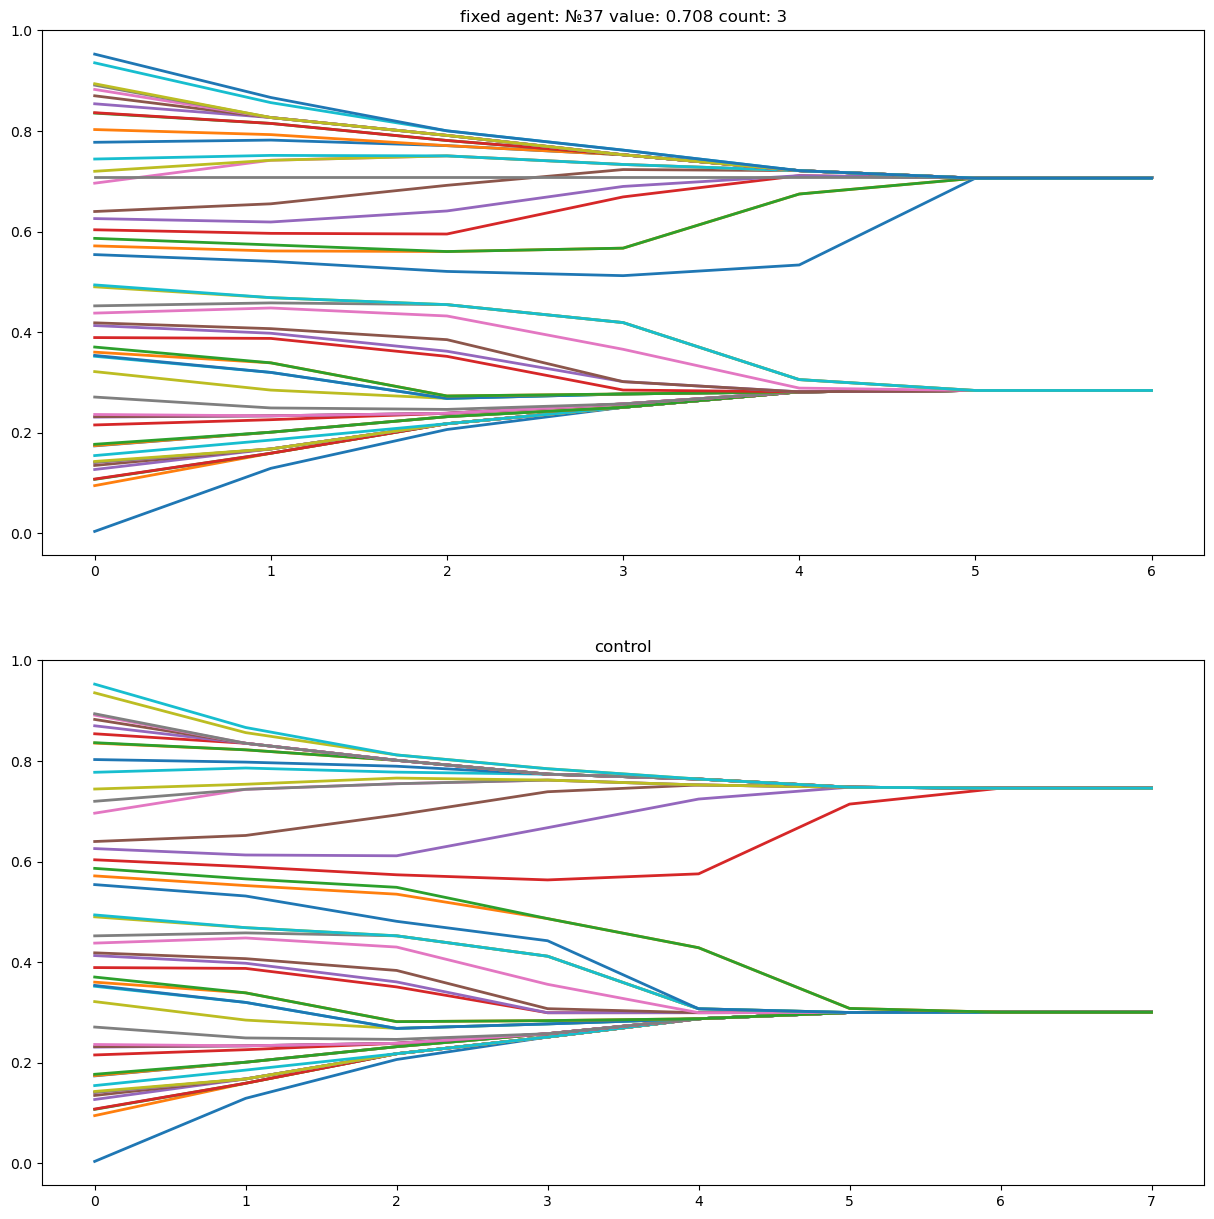

In [4]:
fig = plt.figure(facecolor='white', figsize=(15, 15))

ax = fig.add_subplot(211)
ax.plot(t_list, X, linewidth=2)

ax2 = fig.add_subplot(212)
ax2.plot(t_c_list, X_control, linewidth=2)

ax.title.set_text(f'fixed agent: №{best_ind} value: {X[0][best_ind]:.3f} count: {best_count}')
ax2.title.set_text('control')
plt.show()

In [6]:
n = 50
print(n)
eps = 0.2
eps2 = 0.0001

x0 = np.linspace(0, 1, num=n)

start = pair_count(x0)
print(x0)

#X = [np.array(x0)]
t = 0
v = 0
v_c = 0

ind = 27
best_ind = 0
best_count = 0
all = []
fix_control = set({})
X_control, t_control = Hen_Kr(x0,eps,eps2,fix_control, v_c)
finish_c = pair_count(X_control[t_control])
x = insert_agent(x0,ind)

fix = set({ind})
print(fix, x[ind])

X, t = Hen_Kr(x,eps,eps2,fix, v)

finish = pair_count(X[t], fix)
t_list = np.linspace(0, t, t + 1)
t_c_list = np.linspace(0, t_control, t_control + 1)

50
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]
{27} 0.5408163265306122


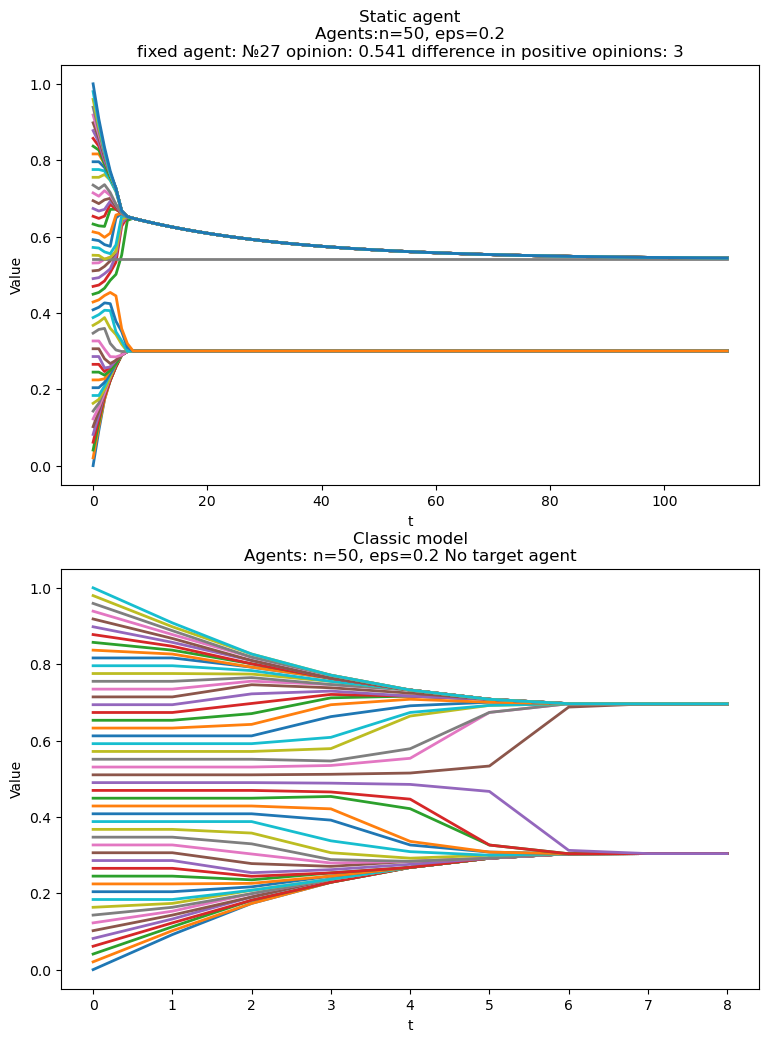

In [7]:
fig = plt.figure(facecolor='white', figsize=(9, 12))

ax = fig.add_subplot(211)
ax.plot(t_list, X, linewidth=2)

ax2 = fig.add_subplot(212)
ax2.plot(t_c_list, X_control, linewidth=2)

ax.title.set_text(f'Static agent\nAgents:n={n}, eps={eps}\nfixed agent: №{ind} opinion: {X[0][ind]:.3f} difference in positive opinions: {finish[0] - finish_c[0]}')
ax2.title.set_text(f'Classic model\nAgents: n={n}, eps={eps} No target agent')

ax.set_xlabel('t')
ax.set_ylabel('Value')
ax2.set_xlabel('t')
ax2.set_ylabel('Value')

plt.show()

In [5]:
print('number of agents: ')
#n = int(input())
n = 50
print(n)
eps = 0.2
eps2 = 0.0001

x0 = np.random.sample(n)
x0.sort()

start = pair_count(x0)
print(x0)

#X = [np.array(x0)]
t = 0
v = eps/n
v_c = 0

best_ind = 0
best_count = 0
all = []
fix_control = set({})
X_control, t_control = Hen_Kr(x0,eps,eps2,fix_control, v_c)
finish_c = pair_count(X_control[t_control])

for ind in trange (n):
    x = insert_agent(x0,ind)

    fix = set({ind})
    print(fix, x[ind])

    X, t = Hen_Kr(x,eps,eps2,fix, v)

    finish = pair_count(X[t], fix)

    if finish[0] - finish_c[0] >= best_count:
        if (finish[0] - finish_c[0] == best_count):
            best_ind = ind
            all.append(ind)
        else:
            best_count = finish[0] - finish_c[0]
            best_ind = ind
            all = []
    print(start, finish_c, finish)

print('best:')
x = insert_agent(x0, best_ind)

fix = set({best_ind})
print(fix, x[best_ind], best_count)
print(all)

X, t = Hen_Kr(x, eps, eps2, fix, v)

t_list = np.linspace(0, t, t + 1)
t_c_list = np.linspace(0, t_control, t_control + 1)

number of agents: 
50
[0.00482887 0.00928542 0.03660307 0.0402997  0.05146959 0.07260292
 0.08618554 0.11608747 0.13819269 0.13952591 0.1436199  0.17333033
 0.18090772 0.19704528 0.21044496 0.2250181  0.23125588 0.24096249
 0.26940734 0.27274628 0.31149817 0.32757731 0.33542708 0.3895921
 0.44110682 0.44622397 0.46545758 0.47137286 0.50802397 0.52874847
 0.6223877  0.63885356 0.65083458 0.66469891 0.68475685 0.71678668
 0.72924116 0.74063129 0.74103477 0.74316447 0.74672112 0.82154411
 0.83066657 0.84082474 0.84923347 0.86912556 0.89573253 0.93766721
 0.93869197 0.95293367]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

{0} 0.004828867635360834


  2%|█▋                                                                                 | 1/50 [00:00<00:31,  1.58it/s]

[22, 28] [21, 29] [50, 0]
{1} 0.007057143173758551


  4%|███▎                                                                               | 2/50 [00:01<00:30,  1.59it/s]

[22, 28] [21, 29] [50, 0]
{2} 0.02294424540897505


  6%|████▉                                                                              | 3/50 [00:01<00:29,  1.58it/s]

[22, 28] [21, 29] [50, 0]
{3} 0.03845138811474241


  8%|██████▋                                                                            | 4/50 [00:02<00:28,  1.62it/s]

[22, 28] [21, 29] [50, 0]
{4} 0.04588464892618216


 10%|████████▎                                                                          | 5/50 [00:03<00:27,  1.65it/s]

[22, 28] [21, 29] [50, 0]
{5} 0.062036257531415784


 12%|█████████▉                                                                         | 6/50 [00:03<00:26,  1.66it/s]

[22, 28] [21, 29] [50, 0]
{6} 0.07939423094990467


 14%|███████████▌                                                                       | 7/50 [00:04<00:25,  1.67it/s]

[22, 28] [21, 29] [50, 0]
{7} 0.10113650353265807


 16%|█████████████▎                                                                     | 8/50 [00:04<00:24,  1.69it/s]

[22, 28] [21, 29] [50, 0]
{8} 0.1271400796985001


 18%|██████████████▉                                                                    | 9/50 [00:05<00:24,  1.69it/s]

[22, 28] [21, 29] [50, 0]
{9} 0.13885930064173396


 20%|████████████████▍                                                                 | 10/50 [00:06<00:23,  1.71it/s]

[22, 28] [21, 29] [50, 0]
{10} 0.14157290332454708


 22%|██████████████████                                                                | 11/50 [00:06<00:22,  1.72it/s]

[22, 28] [21, 29] [50, 0]
{11} 0.15847511343470666


 24%|███████████████████▋                                                              | 12/50 [00:07<00:21,  1.73it/s]

[22, 28] [21, 29] [50, 0]
{12} 0.17711902428543097


 26%|█████████████████████▎                                                            | 13/50 [00:07<00:21,  1.75it/s]

[22, 28] [21, 29] [50, 0]
{13} 0.18897650031519558


 28%|██████████████████████▉                                                           | 14/50 [00:08<00:20,  1.77it/s]

[22, 28] [21, 29] [50, 0]
{14} 0.20374512017597735


 30%|████████████████████████▌                                                         | 15/50 [00:08<00:19,  1.78it/s]

[22, 28] [21, 29] [50, 0]
{15} 0.21773153001064005


 32%|██████████████████████████▏                                                       | 16/50 [00:09<00:19,  1.78it/s]

[22, 28] [21, 29] [50, 0]
{16} 0.2281369925096136


 34%|███████████████████████████▉                                                      | 17/50 [00:09<00:18,  1.80it/s]

[22, 28] [21, 29] [50, 0]
{17} 0.23610918940250264


 36%|█████████████████████████████▌                                                    | 18/50 [00:10<00:17,  1.82it/s]

[22, 28] [21, 29] [50, 0]
{18} 0.2551849175177456


 38%|███████████████████████████████▏                                                  | 19/50 [00:10<00:16,  1.83it/s]

[22, 28] [21, 29] [50, 0]
{19} 0.2710768122516451


 40%|████████████████████████████████▊                                                 | 20/50 [00:11<00:16,  1.82it/s]

[22, 28] [21, 29] [50, 0]
{20} 0.29212222769338214


 42%|██████████████████████████████████▍                                               | 21/50 [00:12<00:15,  1.84it/s]

[22, 28] [21, 29] [50, 0]
{21} 0.3195377409927653


 44%|████████████████████████████████████                                              | 22/50 [00:12<00:14,  1.87it/s]

[22, 28] [21, 29] [50, 0]
{22} 0.3315021972045383


 46%|█████████████████████████████████████▋                                            | 23/50 [00:13<00:14,  1.90it/s]

[22, 28] [21, 29] [50, 0]
{23} 0.3625095936168743


 48%|███████████████████████████████████████▎                                          | 24/50 [00:13<00:13,  1.91it/s]

[22, 28] [21, 29] [50, 0]
{24} 0.4153494604589238


 50%|█████████████████████████████████████████                                         | 25/50 [00:14<00:12,  1.96it/s]

[22, 28] [21, 29] [50, 0]
{25} 0.44366539536041494


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:14<00:10,  2.29it/s]

[22, 28] [21, 29] [20, 30]
{26} 0.4558407743714527


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:14<00:08,  2.61it/s]

[22, 28] [21, 29] [20, 30]
{27} 0.4684152193765414


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:14<00:07,  2.87it/s]

[22, 28] [21, 29] [21, 29]
{28} 0.48969841572759665


 58%|███████████████████████████████████████████████▌                                  | 29/50 [00:15<00:06,  3.14it/s]

[22, 28] [21, 29] [21, 29]
{29} 0.518386217260021


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:15<00:06,  3.33it/s]

[22, 28] [21, 29] [23, 27]
{30} 0.5755680817250566


 62%|██████████████████████████████████████████████████▊                               | 31/50 [00:15<00:05,  3.53it/s]

[22, 28] [21, 29] [26, 24]
{31} 0.6306206308254332


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:15<00:04,  3.73it/s]

[22, 28] [21, 29] [26, 24]
{32} 0.6448440732935552


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [00:16<00:03,  4.20it/s]

[22, 28] [21, 29] [24, 26]
{33} 0.6577667479662253
[22, 28] [21, 29] [23, 27]


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [00:16<00:03,  4.42it/s]

{34} 0.6747278813618651
[22, 28] [21, 29] [22, 28]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:16<00:03,  4.62it/s]

{35} 0.700771762558912
[22, 28] [21, 29] [22, 28]
{36} 0.7230139179996339


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [00:17<00:02,  5.06it/s]

[22, 28] [21, 29] [21, 29]
{37} 0.7349362229037283
[22, 28] [21, 29] [21, 29]


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [00:17<00:02,  5.20it/s]

{38} 0.7408330264518368
[22, 28] [21, 29] [21, 29]
{39} 0.7420996208359758


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [00:17<00:01,  5.40it/s]

[22, 28] [21, 29] [21, 29]
{40} 0.744942797944341
[22, 28] [21, 29] [21, 29]
{41} 0.7841326177708414


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:17<00:01,  5.97it/s]

[22, 28] [21, 29] [21, 29]
{42} 0.8261053408368799
[22, 28] [21, 29] [20, 30]
{43} 0.8357456544008479


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [00:18<00:00,  6.52it/s]

[22, 28] [21, 29] [20, 30]
{44} 0.8450291071875939
[22, 28] [21, 29] [20, 30]
{45} 0.8591795148298036


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [00:18<00:00,  7.05it/s]

[22, 28] [21, 29] [20, 30]
{46} 0.8824290421501283
[22, 28] [21, 29] [20, 30]
{47} 0.916699870374722


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:18<00:00,  7.45it/s]

[22, 28] [21, 29] [22, 28]
{48} 0.9381795937567745
[22, 28] [21, 29] [21, 29]
{49} 0.9458128212222036
[22, 28] [21, 29] [21, 29]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:18<00:00,  2.66it/s]


best:
{24} 0.4153494604589238 29
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


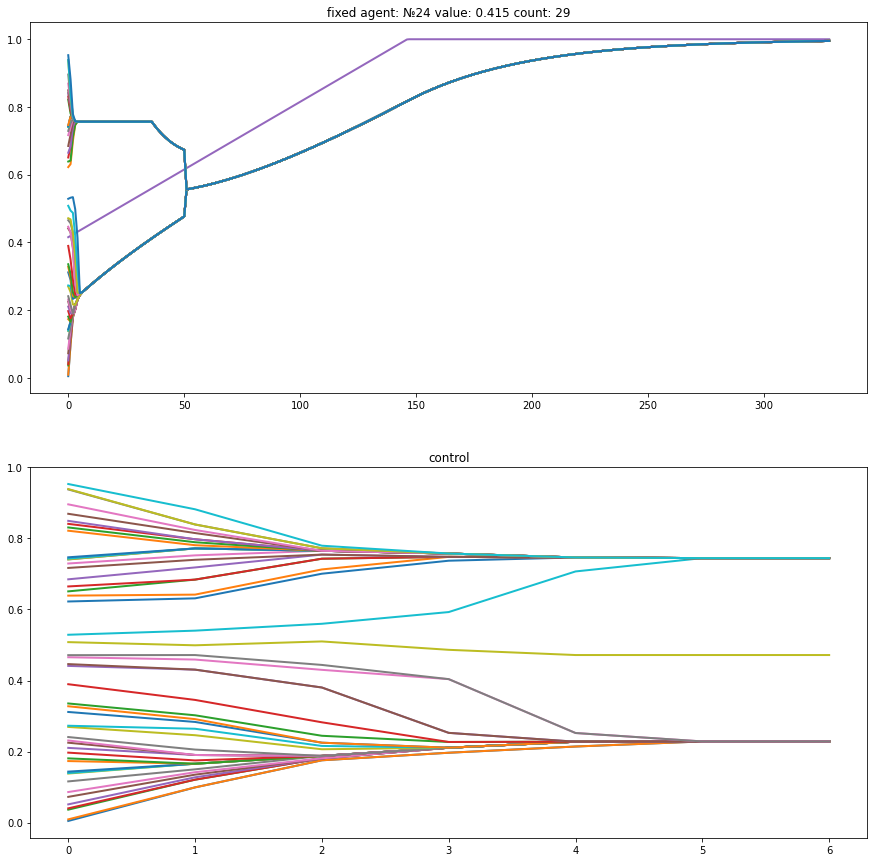

In [6]:
fig = plt.figure(facecolor='white', figsize=(15, 15))

ax = fig.add_subplot(211)
ax.plot(t_list, X, linewidth=2)

ax2 = fig.add_subplot(212)
ax2.plot(t_c_list, X_control, linewidth=2)

ax.title.set_text(f'fixed agent: №{best_ind} value: {X[0][best_ind]:.3f} count: {best_count}')
ax2.title.set_text('control')
plt.show()

In [41]:
from scipy.stats import bernoulli
x_bin=np.arange(1,51)
active_mask = bernoulli.rvs(p=0.5, size=n)
active_mask

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1])

No handles with labels found to put in legend.


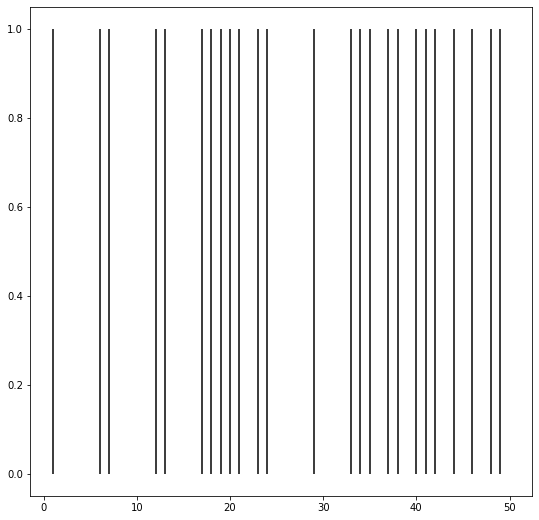

In [8]:
fig = plt.figure(facecolor='white', figsize=(9, 9))

ax = fig.add_subplot()
ax.vlines(x_bin,0, active_mask, colors='k', linestyles='-')
ax.legend(loc='best', frameon=False)
plt.show()

In [42]:
def clusters(x0,eps2, fix = {}):
    count = [x0[0]]
    l=0
    for i in range(1,len(x0)):
        if i not in fix:
            for j in range (len(count)):
                if np.abs(x0[i] - count[j])<eps2:
                    l+=1
            if l==0:
                count.append(x0[i])
            l=0
    return count
def Hen_Kr_actm (x0, eps, eps2,fix, v, prob):
    X = [np.array(x0)]
    t = 0
    while True:
        X.append(np.zeros(len(x0)))
        active_mask = bernoulli.rvs(p=prob, size=n)
        t += 1
        for j in range(len(x0)):
            if j not in fix and active_mask[j]==1:
                X[t][j] = new_op(X[t - 1], j, eps)
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t

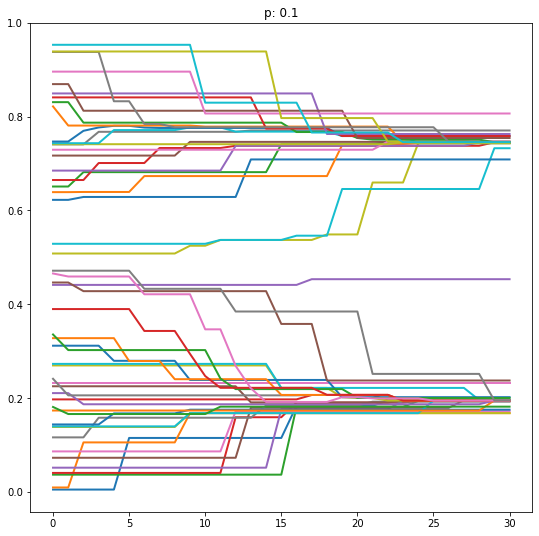

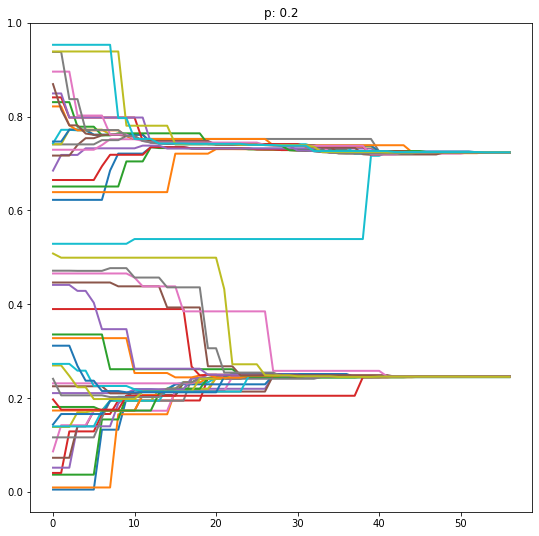

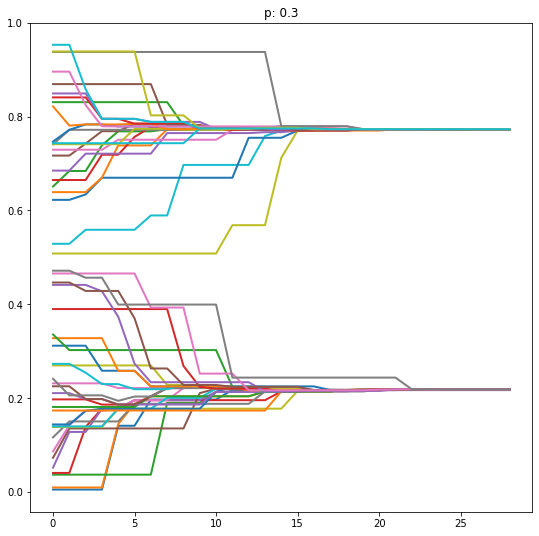

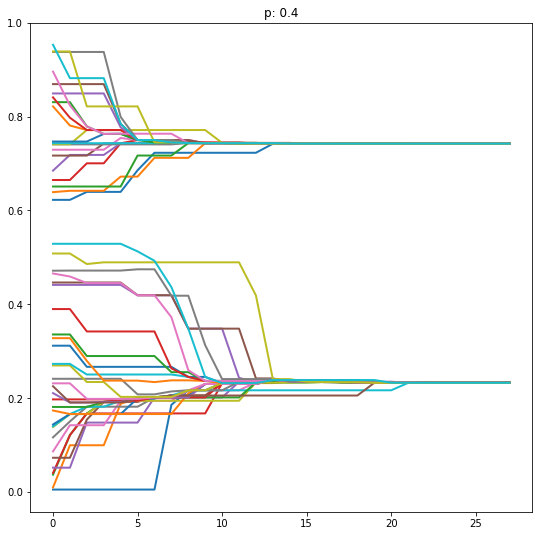

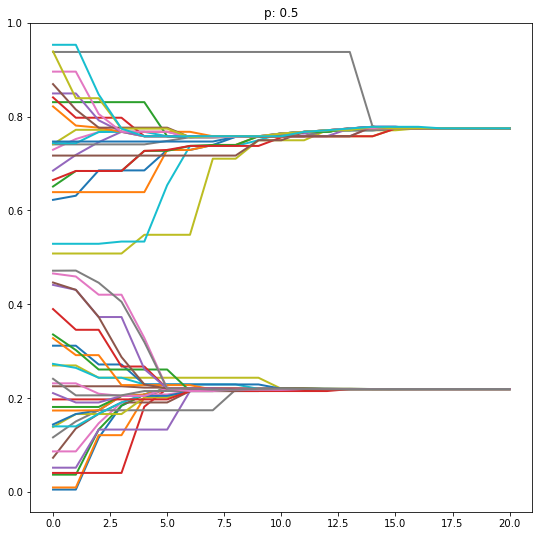

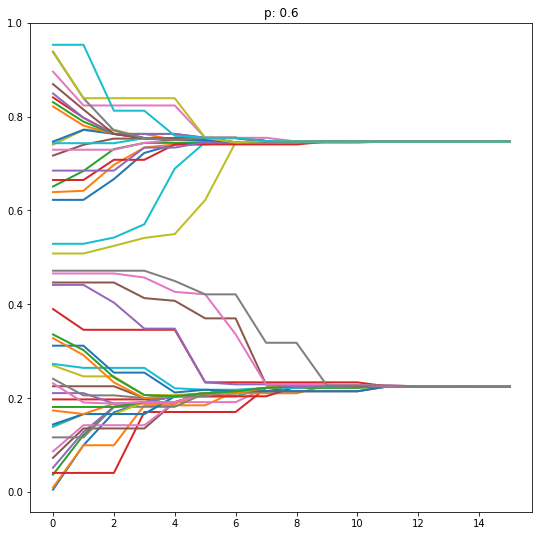

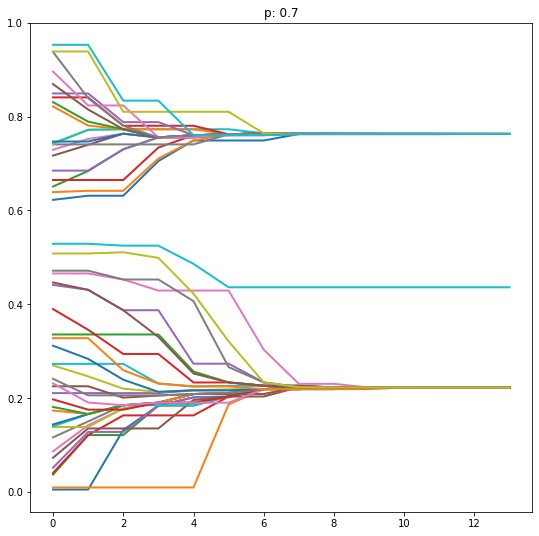

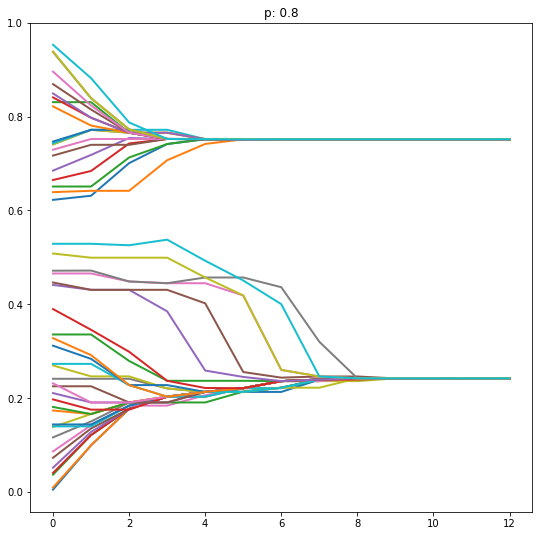

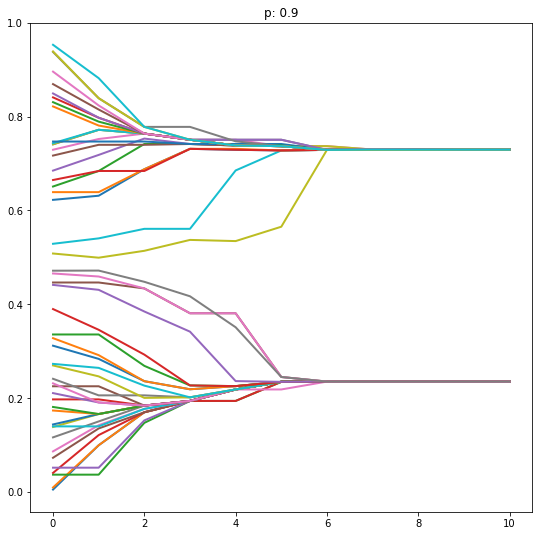

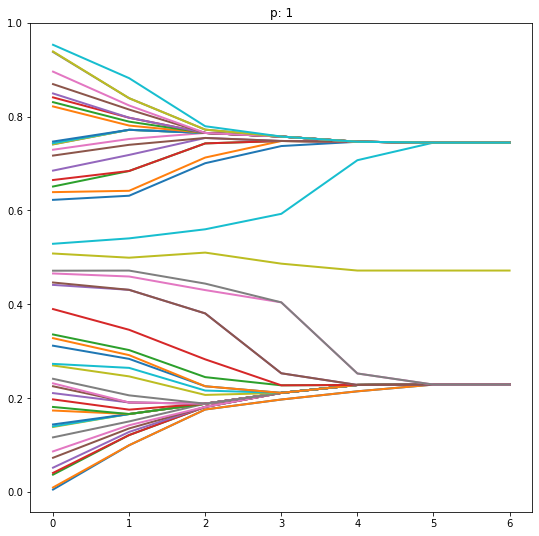

In [10]:
probes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for prob in probes:
    X_control, t_control = Hen_Kr_actm(x0,eps,eps2,fix_control, v_c, prob)
    t_c_list = np.linspace(0, t_control, t_control + 1)
    fig = plt.figure(facecolor='white', figsize=(9, 9))

    ax2 = fig.add_subplot()
    ax2.plot(t_c_list, X_control, linewidth=2)

    ax2.title.set_text(f'p: {prob}')
    plt.show()

In [11]:
probes = np.linspace(0.1, 1, 20)
probes

array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])

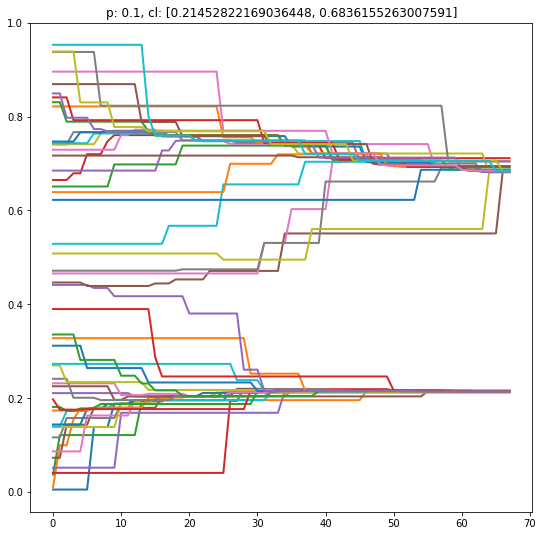

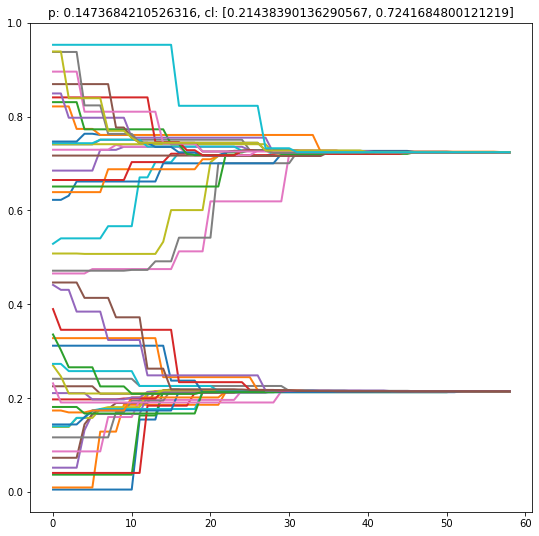

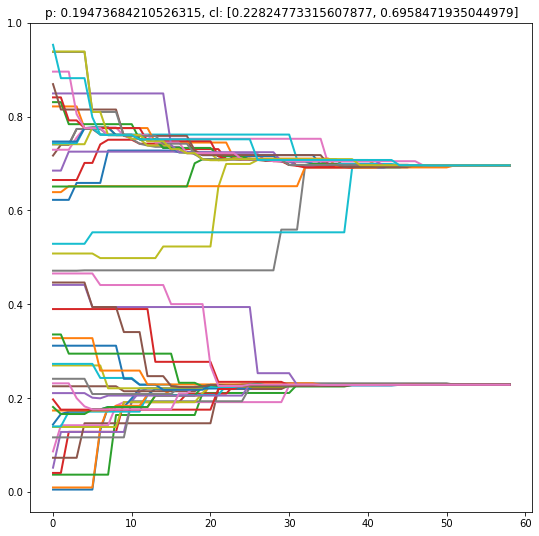

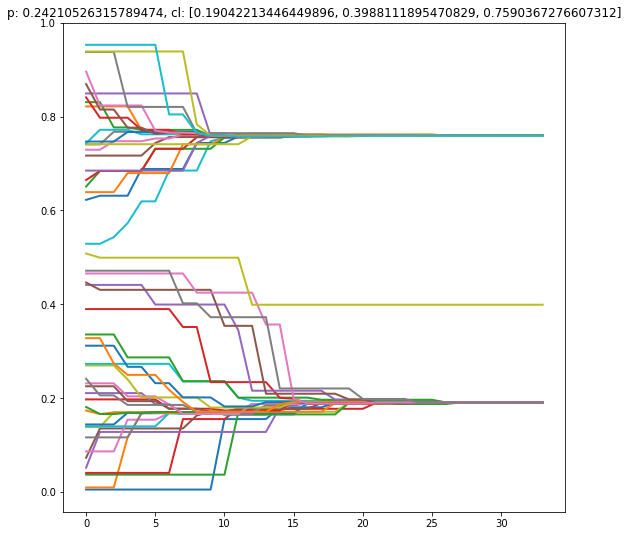

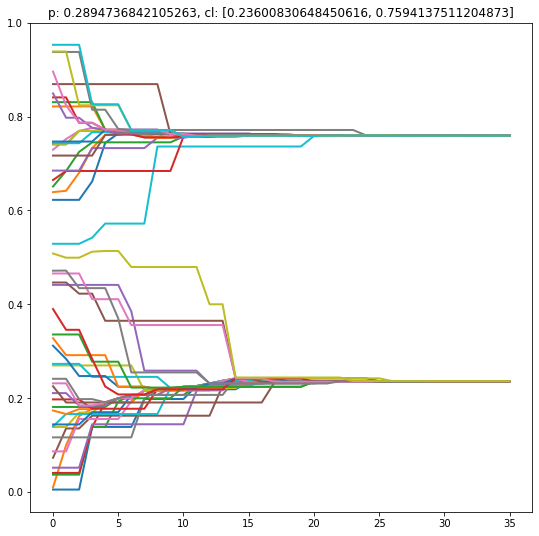

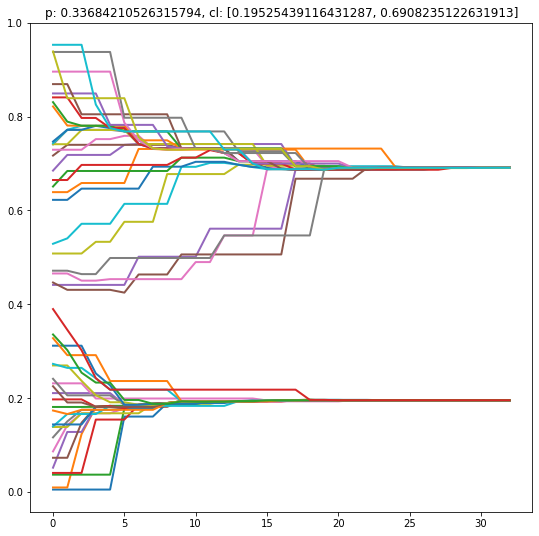

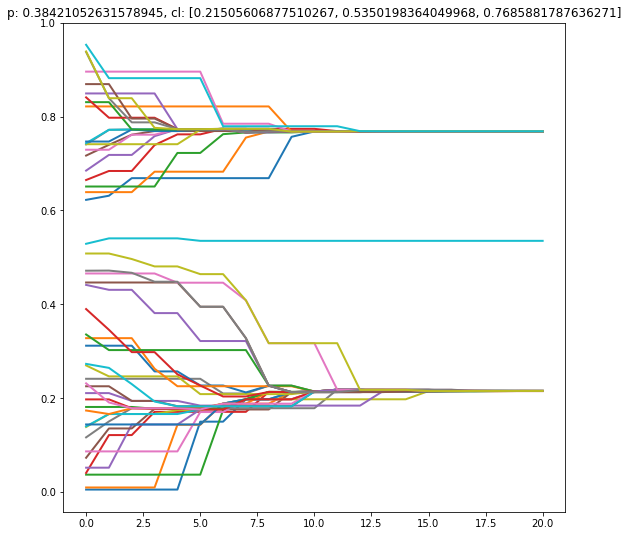

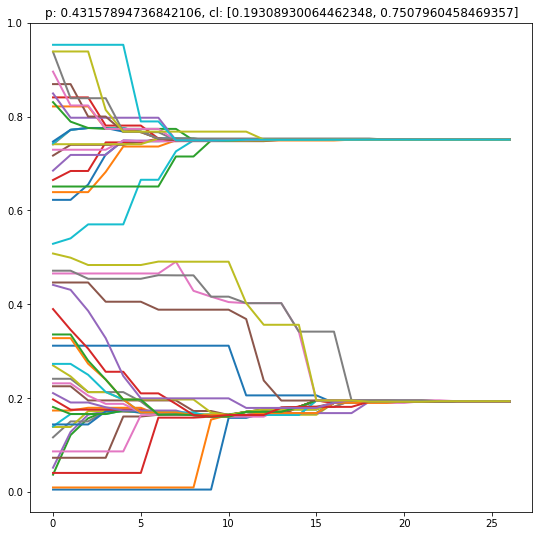

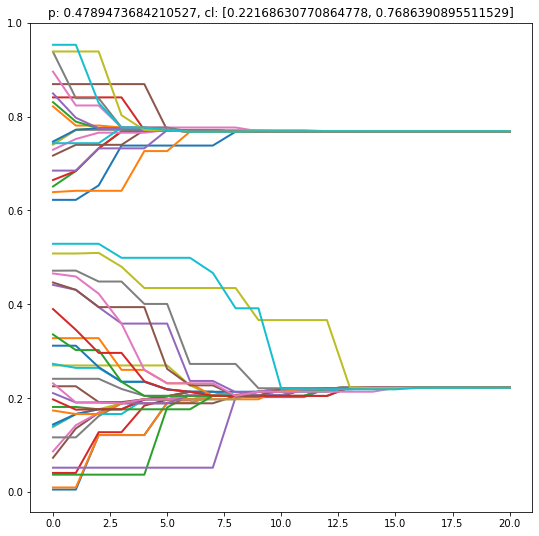

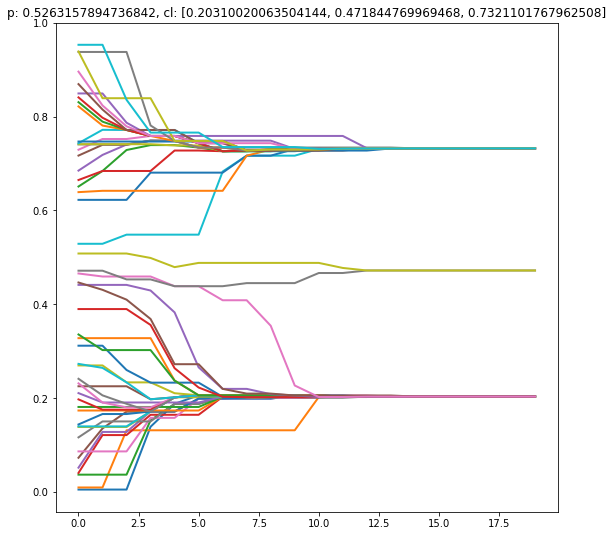

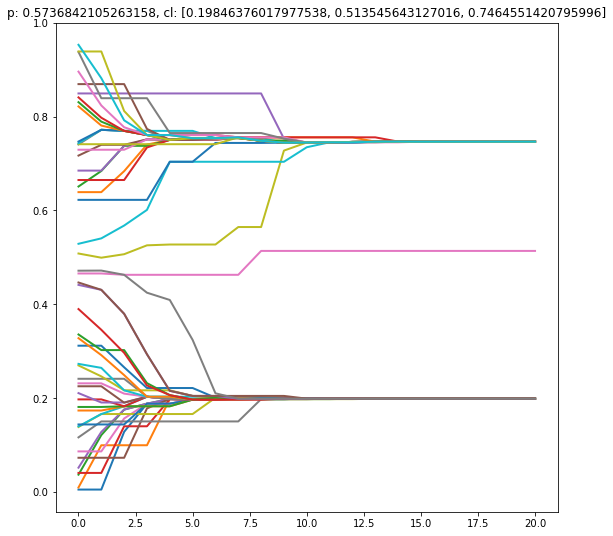

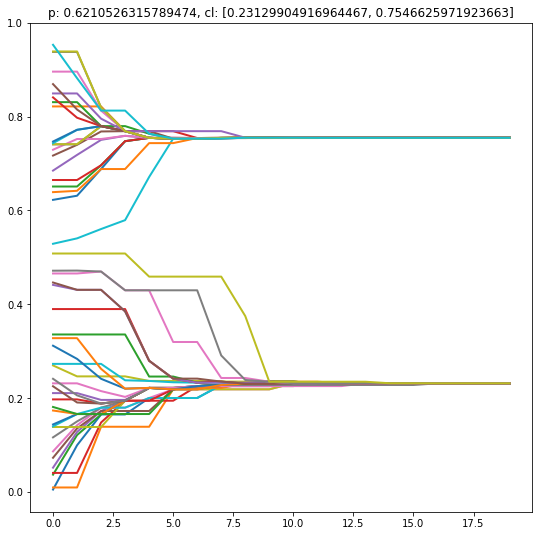

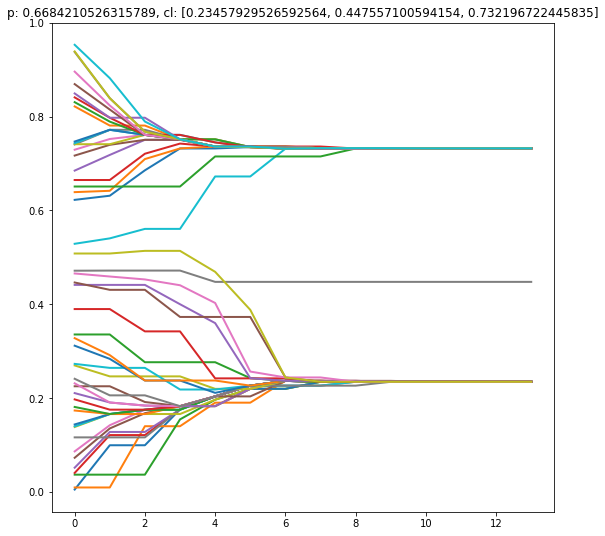

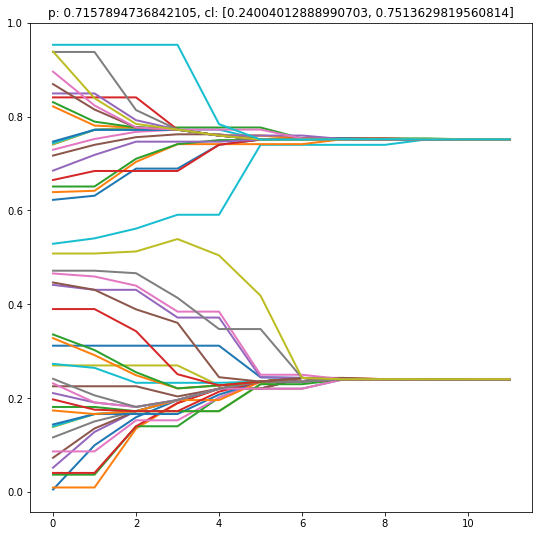

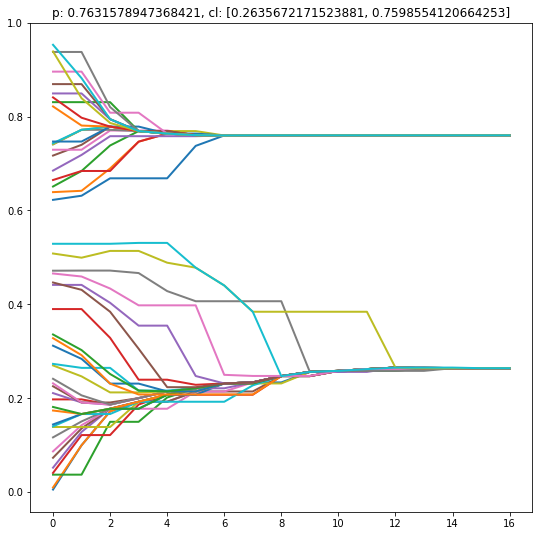

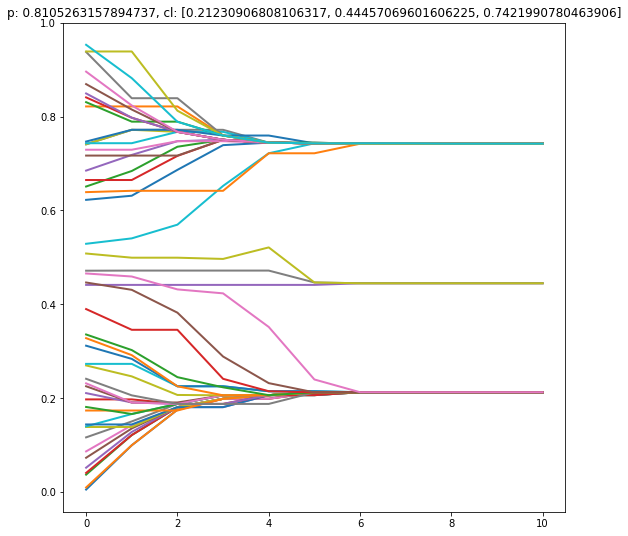

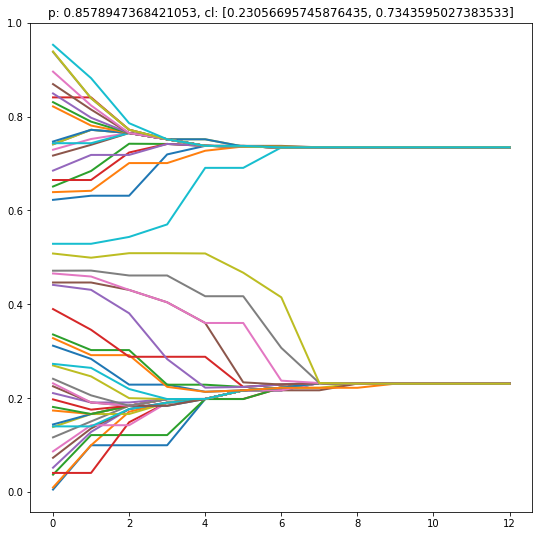

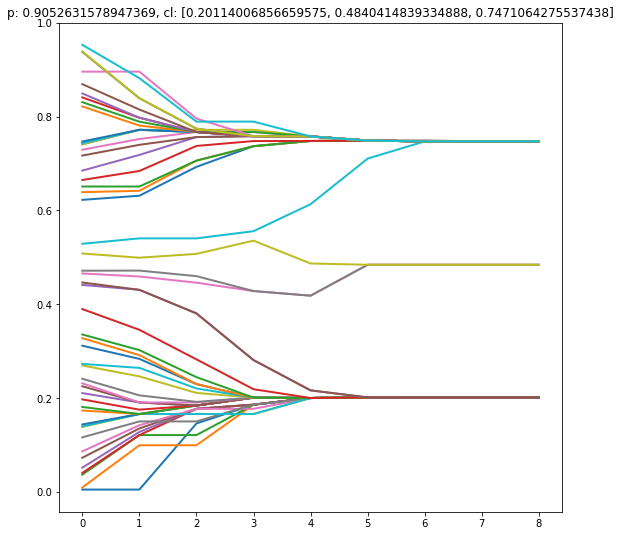

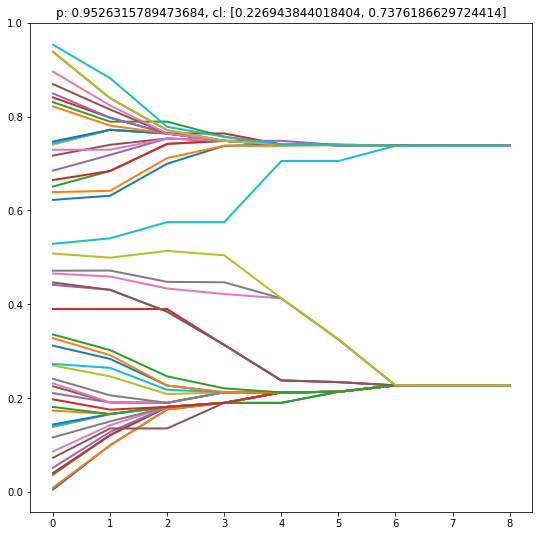

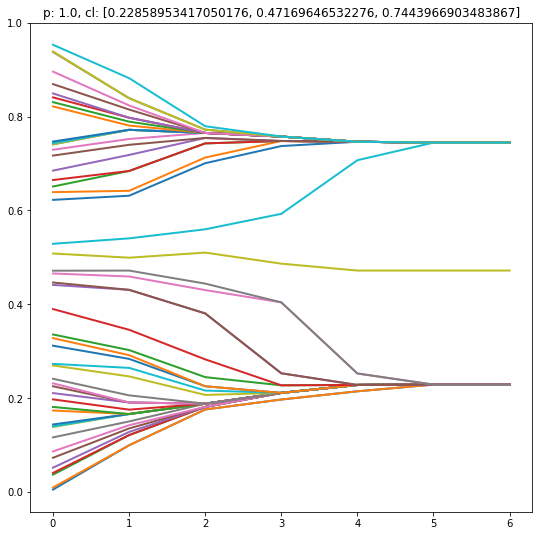

In [12]:
probes = np.linspace(0.1, 1, 20)
for prob in probes:
    X_control, t_control = Hen_Kr_actm(x0,eps,eps2,fix_control, v_c, prob)
    t_c_list = np.linspace(0, t_control, t_control + 1)
    cltrs = clusters(X_control[t_control],eps,fix_control)
    #print(cltrs)
    fig = plt.figure(facecolor='white', figsize=(9, 9))

    ax2 = fig.add_subplot()
    ax2.plot(t_c_list, X_control, linewidth=2)

    ax2.title.set_text(f'p: {prob}, cl: {cltrs}')
    plt.show()

In [13]:
cltrs = clusters(X_control[t_control],eps,fix_control)
cltrs

[0.22858953417050176, 0.47169646532276, 0.7443966903483867]

In [14]:
active_mask == 1
print(X_control[-1])
X_prev = X_control[-1]
print(X_prev)
X_prev[active_mask==0]=0
print(X_prev)

[0.22858953 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953
 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953
 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953
 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953
 0.22858953 0.22858953 0.22858953 0.22858953 0.47169647 0.74439669
 0.74439669 0.74439669 0.74439669 0.74439669 0.74439669 0.74439669
 0.74439669 0.74439669 0.74439669 0.74439669 0.74439669 0.74439669
 0.74439669 0.74439669 0.74439669 0.74439669 0.74439669 0.74439669
 0.74439669 0.74439669]
[0.22858953 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953
 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953
 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953
 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953 0.22858953
 0.22858953 0.22858953 0.22858953 0.22858953 0.47169647 0.74439669
 0.74439669 0.74439669 0.74439669 0.74439669 0.74439669 0.74439669
 0.74439669 0.74439669 0.74439669 0.74

In [9]:
def Hen_Kr_actm2 (x0, eps, eps2,fix, v, prob):
    X = [np.array(x0)]
    t = 0
    while True:
        X.append(np.zeros(len(x0)))
        active_mask = bernoulli.rvs(p=prob, size=n)
        t += 1
        for j in range(len(x0)):
            if j not in fix and active_mask[j]==1:
                X_prev = np.copy(X[t -1])
                X_prev[active_mask==0]=0-2*eps - 2*eps2 
                X[t][j] = new_op(X_prev, j, eps)
                X[t][active_mask==0]=X[t-1][active_mask==0]
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t

In [10]:
probes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
x0 = np.linspace(0, 1, num=n)
for prob in probes:
    X_control, t_control = Hen_Kr_actm2(x0,eps,eps2,fix_control, v_c, prob)
    t_c_list = np.linspace(0, t_control, t_control + 1)
    fig = plt.figure(facecolor='white', figsize=(9, 9))
    cltrs = clusters(X_control[t_control],eps,fix_control)
    print(cltrs)
    ax2 = fig.add_subplot()
    ax2.plot(t_c_list, X_control, linewidth=2)
    
    ax.set_xlabel('t')
    ax.set_ylabel('Value')
    ax2.set_xlabel('t')
    ax2.set_ylabel('Value')


    ax2.title.set_text(f'p: {prob}')
    plt.show()

NameError: name 'bernoulli' is not defined